In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import cv2
from PIL import Image
from torchvision.models.detection import maskrcnn_resnet50_fpn, MaskRCNN_ResNet50_FPN_Weights

In [2]:
device = torch.device('cuda')

In [3]:
weights = MaskRCNN_ResNet50_FPN_Weights.DEFAULT
model = maskrcnn_resnet50_fpn(weights=weights, progress=False).to(device)
model = model.eval()

In [4]:
# incarc toate clasele din datasetul pe care a fost antrenat modelul
labels = open(r"E:\GitHub\realtime-detection\coco_names.txt").read().strip().split("\n")
# generez o culoare pentru fiecare clasa in parte
colors = np.random.randint(0, 255, size=(len(labels), 3), dtype="uint8")

In [5]:
image = Image.open(r"E:\GitHub\realtime-detection\images\image.jpg").convert('RGB')

In [6]:
transforms = weights.transforms()
image = transforms(image)
image=image.unsqueeze(0)
image = image.to(device)

In [7]:
output = model(image) # list of dict
print(output[0].keys())

dict_keys(['boxes', 'labels', 'scores', 'masks'])


In [8]:
source = np.asarray(Image.open(r"E:\GitHub\realtime-detection\images\image.jpg").convert('RGB'))

In [9]:
for index, score in enumerate(output[0]['scores']):
    if score > 0.5:
        source = cv2.rectangle(source, 
                               (int(output[0]['boxes'][index][0]), int(output[0]['boxes'][index][1])), 
                               (int(output[0]['boxes'][index][2]), int(output[0]['boxes'][index][3])),
                               (int(colors[int(output[0]['labels'][index])][0]), int(colors[int(output[0]['labels'][index])][1]), int(colors[int(output[0]['labels'][index])][2])),
                               2)
        source = cv2.putText(source, 
                             labels[int(output[0]['labels'][index])-1], 
                             (int(output[0]['boxes'][index][0]), int(output[0]['boxes'][index][1])-5), 
                             cv2.FONT_HERSHEY_SIMPLEX , 
                             1, 
                             (int(colors[int(output[0]['labels'][index])][0]), int(colors[int(output[0]['labels'][index])][1]), int(colors[int(output[0]['labels'][index])][2])), 
                             2, 
                             cv2.LINE_AA)

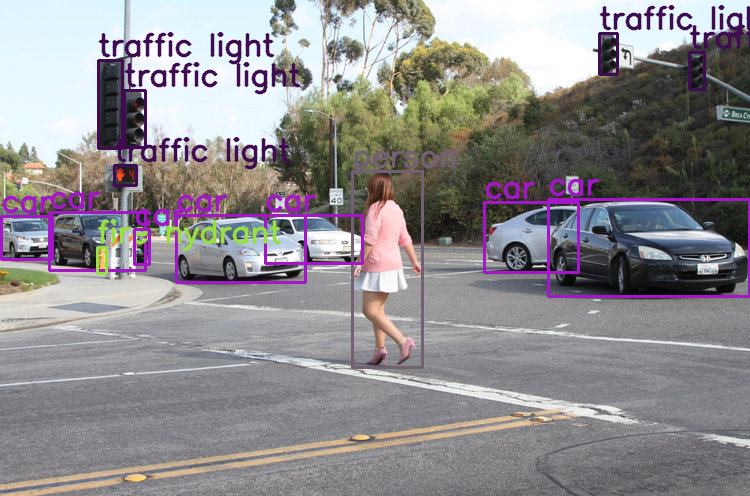

In [10]:
Image.fromarray(source)